In [516]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.style.use('ggplot')  

In [412]:
dataset_tuple = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                                    n_classes=2, flip_y=0.001, hypercube=False, class_sep=1.5, random_state=14)

In [574]:
Xs = pd.DataFrame(dataset_tuple[0], columns=['f1', 'f2'])
ys = pd.DataFrame(dataset_tuple[1], columns=['class_'])
dataset = pd.concat([Xs, ys], axis=1)

In [414]:
dataset.head()

,f1,f2,class_
0,1.302249,-0.623752,1
1,-0.409616,-0.588821,0
2,-2.012866,-0.590532,0
3,1.255486,-0.388024,1
4,1.274457,-0.585658,1


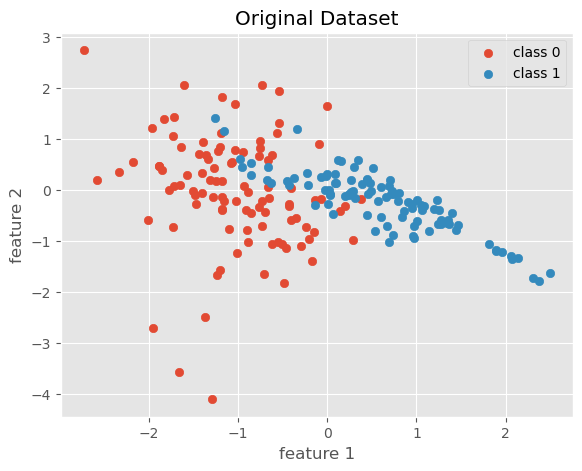

In [575]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.8, 0.8])
axes.scatter(dataset[dataset['class_']==0]['f1'], dataset[dataset['class_']==0]['f2'], label='class 0')
axes.scatter(dataset[dataset['class_']==1]['f1'], dataset[dataset['class_']==1]['f2'], label='class 1')
axes.set_xlabel('feature 1')
axes.set_ylabel('feature 2')
axes.set_title('Original Dataset\n')
axes.legend()


In [576]:
# make some distance between two classes
mask_class1 = dataset['class_'] == 1
dataset.loc[mask_class1, 'f2'] = dataset.loc[mask_class1, 'f2'] + 1
mask_class0 = dataset['class_'] == 0
dataset.loc[mask_class0, 'f2'] = dataset.loc[mask_class0, 'f2'] - 1
dataset.head()

,f1,f2,class_
0,1.302249,0.376248,1
1,-0.409616,-1.588821,0
2,-2.012866,-1.590532,0
3,1.255486,0.611976,1
4,1.274457,0.414342,1


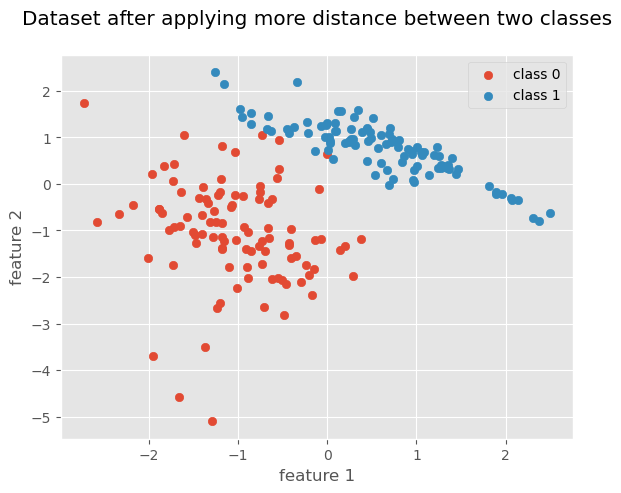

In [577]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.8, 0.8])
axes.scatter(dataset[dataset['class_']==0]['f1'], dataset[dataset['class_']==0]['f2'], label='class 0')
axes.scatter(dataset[dataset['class_']==1]['f1'], dataset[dataset['class_']==1]['f2'], label='class 1')
axes.set_xlabel('feature 1')
axes.set_ylabel('feature 2')
axes.set_title('Dataset after applying more distance between two classes\n')
axes.legend()

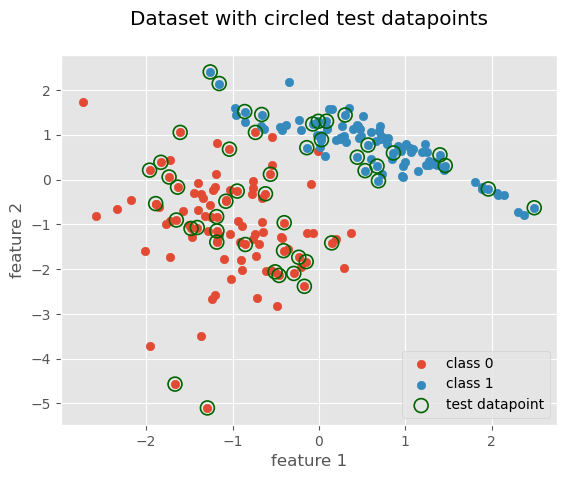

In [579]:
Xs = np.array(dataset.loc[:, ['f1', 'f2']])
Ys = np.array(dataset.loc[:, ['class_']]).astype(np.float64)
Ys = Ys[:, 0]


plt.scatter(dataset[dataset['class_']==0]['f1'], dataset[dataset['class_']==0]['f2'], label='class 0')
plt.scatter(dataset[dataset['class_']==1]['f1'], dataset[dataset['class_']==1]['f2'], label='class 1')

X_train, X_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.25, random_state=4)
plt.scatter(X_test[:, 0], X_test[:, 1], facecolor='none', edgecolor='darkgreen', s=100, label='test datapoint', linewidths=1.2)

plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Dataset with circled test datapoints\n')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=['class_'])
iris_dataset = pd.concat([data, target], axis=1)

sns.pairplot(iris_dataset, hue='class_')

In [524]:
class logistic_regression():
    
    def __init__(self, alpha):
        self.tetha0, self.tetha1, self.tetha2 = self.initializer()
        self.alpha = alpha
    
    def hypothesis(self, x):
        z = -1 * (self.tetha0 + self.tetha1 * x[:, 0] + self.tetha2 * x[:, 1])
        res = 1 / (1 + np.exp(z))
        return res
    
    def cost_function(self, x, y):
        predicted_y = self.hypothesis(x)
        # in order to prevent zero division error in np.log() function
        predicted_y = np.where(predicted_y == 0, 0.00000000001, predicted_y)
        predicted_y = np.where(predicted_y == 1, 0.99999999999, predicted_y)
        cost = (-1 * (y * np.log(predicted_y) + (1-y) * np.log(1 - predicted_y))).sum()
        return cost
    
    def update(self, x, y):
        predicted_y = self.hypothesis(x)
        delta_tetha0 = (predicted_y - y).sum() * 1/len(y)
        delta_tetha1 = ((predicted_y - y) * x[:, 0]).sum() * 1/len(y)
        delta_tetha2 = ((predicted_y - y) * x[:, 1]).sum() * 1/len(y)

        self.tetha0 = self.tetha0 - (self.alpha * delta_tetha0)
        self.tetha1 = self.tetha1 - (self.alpha * delta_tetha1)
        self.tetha2 = self.tetha2 - (self.alpha * delta_tetha2)
    
    def initializer(self):
        np.random.seed(1)
        return np.random.random(3)

    def predict(self, x):
        predicted_y = self.hypothesis(x)
        predicted_y = np.round(predicted_y)
        return predicted_y


In [561]:
my_classifier = logistic_regression(0.05)
fig, ax = plt.subplots()
loss_on_train = []
loss_on_test = []
accuracy_on_train = []
accuracy_on_test = []

line_x = np.linspace(min(Xs[:, 0]), max(Xs[:, 0]), 100)

def animate(i):
    loss_on_train.append(my_classifier.cost_function(X_train, y_train))
    loss_on_test.append(my_classifier.cost_function(X_test, y_test))
    accuracy_on_train.append( np.mean(my_classifier.predict(X_train) == y_train))
    accuracy_on_test.append( np.mean(my_classifier.predict(X_test) == y_test))
    # print(loss_on_train, loss_on_test, accuracy_on_train, accuracy_on_test)
    ax.cla()
    ax.set_title('Estimating the best Decision Boundary\n')
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-5.2, 3)
    
    m = -my_classifier.tetha1 / my_classifier.tetha2
    c = -my_classifier.tetha0 / my_classifier.tetha2
    line_y = m * line_x + c
    
    ax.scatter(dataset[dataset['class_']==0]['f1'], dataset[dataset['class_']==0]['f2'], label='class 0')
    ax.scatter(dataset[dataset['class_']==1]['f1'], dataset[dataset['class_']==1]['f2'], label='class 1')
    # ax.scatter(X_test[:, 0], X_test[:, 1], facecolor='none', edgecolor='darkgreen', s=100, label='test datapoint', linewidths=1.2, alpha=0.7)
    ax.plot(line_x, line_y, label='decision boundary', color='darkgreen', alpha=0.7, linestyle='--')
    ax.legend(loc='lower right')
    my_classifier.update(X_train, y_train)

ani = FuncAnimation(fig, animate, frames=600, interval=15)

plt.close()

In [562]:
HTML(ani.to_html5_video())

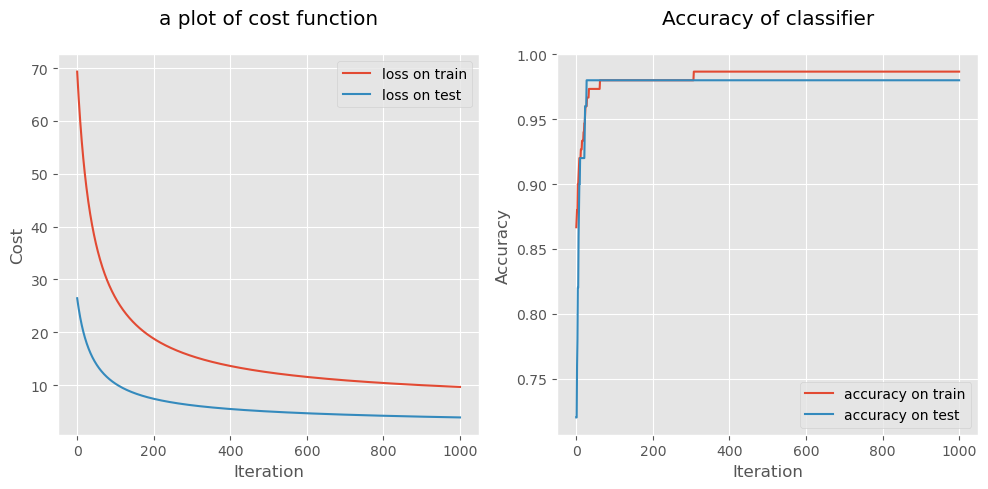

In [570]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


axes[0].plot(list(range(len(loss_on_train))), loss_on_train, label='loss on train')
axes[0].plot(list(range(len(loss_on_test))), loss_on_test, label='loss on test')
axes[0].legend()
axes[0].set_title('a plot of cost function\n')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Cost')


axes[1].plot(list(range(len(accuracy_on_train))), accuracy_on_train, label='accuracy on train')
axes[1].plot(list(range(len(accuracy_on_test))), accuracy_on_test, label='accuracy on test')
axes[1].legend()
axes[1].set_title('Accuracy of classifier\n')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Accuracy')
plt.tight_layout()
plt.show()

---

In [491]:
sklearn_classifier = LogisticRegression()

sklearn_classifier.fit(X_train, y_train)

LogisticRegression()

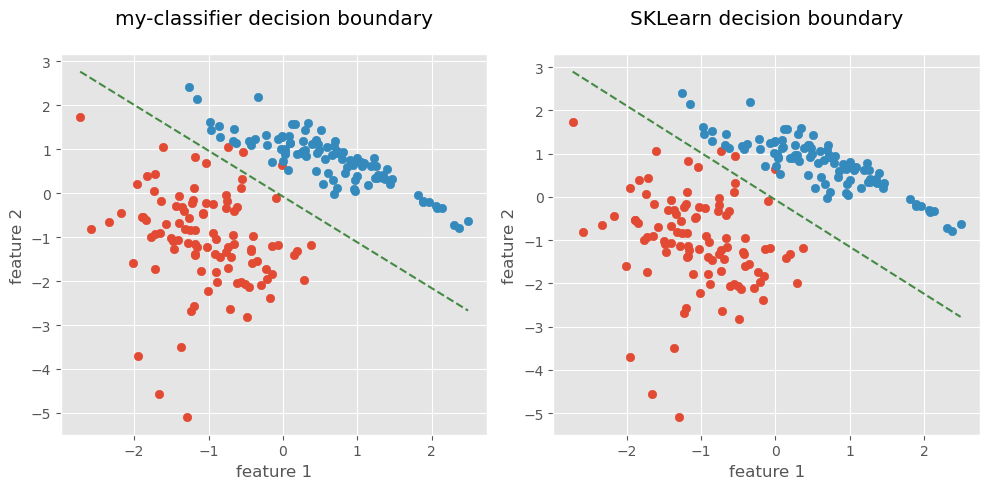

In [583]:
line_x = np.linspace(min(Xs[:, 0]), max(Xs[:, 0]), 100)
m = -my_classifier.tetha1 / my_classifier.tetha2
c = -my_classifier.tetha0 / my_classifier.tetha2
line_y = m * line_x + c


sk_line_x = np.linspace(min(Xs[:, 0]), max(Xs[:, 0]), 100)
m = -sklearn_classifier.coef_[0,0] / sklearn_classifier.coef_[0,1]
c = -sklearn_classifier.intercept_[0] / sklearn_classifier.coef_[0,1]
sk_line_y = m * line_x + c


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].scatter(dataset[dataset['class_']==0]['f1'], dataset[dataset['class_']==0]['f2'], label='class 0')
axes[0].scatter(dataset[dataset['class_']==1]['f1'], dataset[dataset['class_']==1]['f2'], label='class 1')
axes[0].plot(line_x, line_y, label='decision boundary', color='darkgreen', alpha=0.7, linestyle='--')
axes[0].set_xlabel('feature 1')
axes[0].set_ylabel('feature 2')
axes[0].set_title('my-classifier decision boundary\n')

axes[1].scatter(dataset[dataset['class_']==0]['f1'], dataset[dataset['class_']==0]['f2'], label='class 0')
axes[1].scatter(dataset[dataset['class_']==1]['f1'], dataset[dataset['class_']==1]['f2'], label='class 1')
axes[1].plot(sk_line_x, sk_line_y, label='decision boundary', color='darkgreen', alpha=0.7, linestyle='--')
axes[1].set_xlabel('feature 1')
axes[1].set_ylabel('feature 2')
axes[1].set_title('SKLearn decision boundary\n')

plt.tight_layout()
plt.show()

In [492]:
def accuracy_calculator(preds):
    acc = np.mean(preds == y_test)
    return acc

log_preds = my_classifier.predict(X_test)
sklearn_classifier_preds = sklearn_classifier.predict(X_test)

accuracy_on_mine = accuracy_calculator(log_preds)
accuracy_on_sklearn = accuracy_calculator(sklearn_classifier_preds)

print('\n-------------------------------------------------------------------------------------------------')
print('final accuracy of the from scratch version on test dataset :', accuracy_on_mine)
print('-------------------------------------------------------------------------------------------------')
print('final accuracy of the scikit-learn linear regression model on test dataset :', accuracy_on_sklearn)
print('-------------------------------------------------------------------------------------------------\n')


-------------------------------------------------------------------------------------------------
final accuracy of the from scratch version on test dataset : 0.98
-------------------------------------------------------------------------------------------------
final accuracy of the scikit-learn linear regression model on test dataset : 0.98
-------------------------------------------------------------------------------------------------



---
### Second Phase
---

In [584]:
from sklearn.datasets import make_moons

-0.03356476901631703 -0.4565180743644803


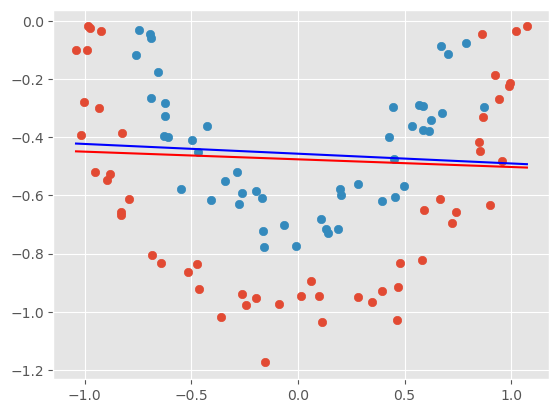

In [627]:
# -----------------------------------------------------
# from sklearn.datasets import make_moons
# Xs, ys = make_moons(n_samples=150, noise=0.2, random_state=10)

# Xs[ys==0, 1] = Xs[ys==0, 1] + 1
# -----------------------------------------------------
# -----------------------------------------------------

from sklearn.datasets import make_circles

Xs, ys = make_circles(n_samples=200, noise=0.07, random_state=10, factor=0.7)
ys = ys[Xs[:, 1] <= 0]
Xs = Xs[Xs[:, 1] <= 0]
# -----------------------------------------------------

classifier = logistic_regression(0.5)
for i in range(1000):
    classifier.update(Xs, ys)

Xs_line1 = np.linspace(min(Xs[:, 0]), max(Xs[:, 0]), 100)
m = -classifier.tetha1 / classifier.tetha2
c = -classifier.tetha0 / classifier.tetha2
ys_line1 = m * Xs_line1 + c

sk_classifier = LogisticRegression()

sk_classifier.fit(Xs, ys)

Xs_line2 = np.linspace(min(Xs[:, 0]), max(Xs[:, 0]), 100)
m = -sk_classifier.coef_[0,0] / sk_classifier.coef_[0,1]
c = -sk_classifier.intercept_[0] / sk_classifier.coef_[0,1]
ys_line2 = m * Xs_line2 + c

print(m, c)

plt.scatter(Xs[ys==0, 0], Xs[ys==0, 1])
plt.scatter(Xs[ys==1, 0], Xs[ys==1, 1])
plt.plot(Xs_line1, ys_line1, color='red')
plt.plot(Xs_line2, ys_line2, color='blue')

as you can see, using the previous classifier to fit on the new dataset will not lead to acceptable results

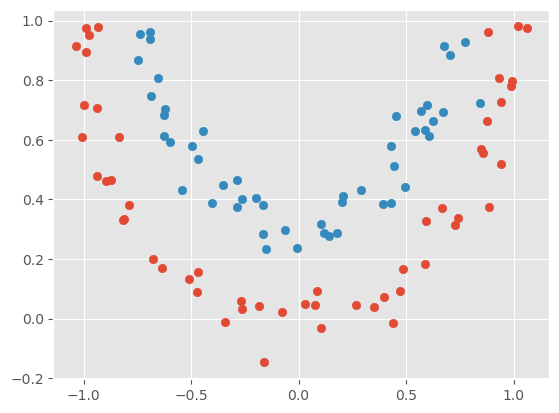

In [664]:
from sklearn.datasets import make_circles

Xs, ys = make_circles(n_samples=200, noise=0.06, random_state=10, factor=0.7)
ys = ys[Xs[:, 1] <= 0]
Xs = Xs[Xs[:, 1] <= 0]
Xs[:, 1] = Xs[:, 1] + 1

plt.scatter(Xs[ys==0, 0], Xs[ys==0, 1])
plt.scatter(Xs[ys==1, 0], Xs[ys==1, 1])

In [639]:
class new_logistic_regression():
    
    def __init__(self, alpha):
        self.tetha0, self.tetha1, self.tetha2, self.tetha3 = self.initializer()
        self.alpha = alpha
    
    def hypothesis(self, x):
        z = -1 * (self.tetha0 + self.tetha1 * x[:, 0] + self.tetha2 * x[:, 1] + self.tetha3 * x[:, 2])
        res = 1 / (1 + np.exp(z))
        return res
    
    def cost_function(self, x, y):
        predicted_y = self.hypothesis(x)
        # in order to prevent zero division error in np.log() function
        predicted_y = np.where(predicted_y == 0, 0.00000000001, predicted_y)
        predicted_y = np.where(predicted_y == 1, 0.99999999999, predicted_y)
        cost = (-1 * (y * np.log(predicted_y) + (1-y) * np.log(1 - predicted_y))).sum()
        return cost
    
    def update(self, x, y):
        predicted_y = self.hypothesis(x)
        delta_tetha0 = (predicted_y - y).sum() * 1/len(y)
        delta_tetha1 = ((predicted_y - y) * x[:, 0]).sum() * 1/len(y)
        delta_tetha2 = ((predicted_y - y) * x[:, 1]).sum() * 1/len(y)
        delta_tetha3 = ((predicted_y - y) * x[:, 2]).sum() * 1/len(y)

        self.tetha0 = self.tetha0 - (self.alpha * delta_tetha0)
        self.tetha1 = self.tetha1 - (self.alpha * delta_tetha1)
        self.tetha2 = self.tetha2 - (self.alpha * delta_tetha2)
        self.tetha3 = self.tetha3 - (self.alpha * delta_tetha3)
    
    def initializer(self):
        np.random.seed(1)
        return np.random.random(4)

    def predict(self, x):
        predicted_y = self.hypothesis(x)
        predicted_y = np.round(predicted_y)
        return predicted_y


0.012067053106827234 0.23225315620243475


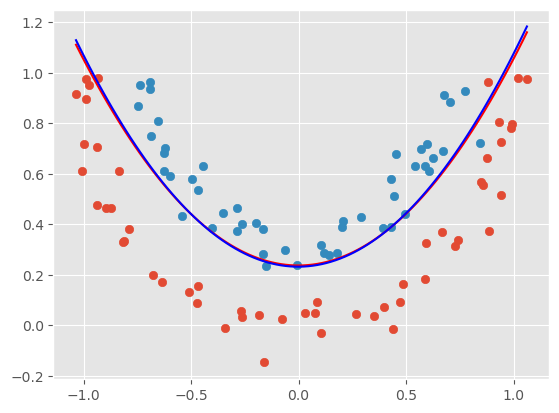

In [683]:
new_Xs = np.concatenate((Xs, (Xs[:, 1]**2).reshape((-1, 1))), axis=1) 

new_classifier_ = new_logistic_regression(.2)
for i in range(10000):
    new_classifier_.update(new_Xs, ys)

Xs_line1 = np.linspace(min(Xs[:, 0]), max(Xs[:, 0]), 100)
m1 = -new_classifier_.tetha1 / new_classifier_.tetha2
m2 = -new_classifier_.tetha3 / new_classifier_.tetha2
c = -new_classifier_.tetha0 / new_classifier_.tetha2
ys_line1 = m2 * Xs_line1**2 + m1 * Xs_line1 + c

non_linear_sk_classifier_ = LogisticRegression(penalty='none', max_iter=5000, tol=1e-7)

non_linear_sk_classifier_.fit(new_Xs, ys)

Xs_line2 = np.linspace(min(new_Xs[:, 0]), max(new_Xs[:, 0]), 100)
m1 = -non_linear_sk_classifier_.coef_[0,0] / non_linear_sk_classifier_.coef_[0,1]
m2 = -non_linear_sk_classifier_.coef_[0,2] / non_linear_sk_classifier_.coef_[0,1]
c = -non_linear_sk_classifier_.intercept_[0] / non_linear_sk_classifier_.coef_[0,1]
ys_line2 = m2 * Xs_line2**2 + m1 * Xs_line2 + c

print(m, c)

plt.scatter(Xs[ys==0, 0], Xs[ys==0, 1])
plt.scatter(Xs[ys==1, 0], Xs[ys==1, 1])
plt.plot(Xs_line1, ys_line1, color='red')
plt.plot(Xs_line2, ys_line2, color='blue')

In [684]:
def accuracy_calculator(preds):
    acc = np.mean(preds == ys)
    return acc

log_preds = new_classifier_.predict(new_Xs)
sklearn_classifier_preds = non_linear_sk_classifier_.predict(new_Xs)

accuracy_on_mine = accuracy_calculator(log_preds)
accuracy_on_sklearn = accuracy_calculator(sklearn_classifier_preds)

print('\n-------------------------------------------------------------------------------------------------')
print('final accuracy of the from scratch version on test dataset :', accuracy_on_mine)
print('-------------------------------------------------------------------------------------------------')
print('final accuracy of the scikit-learn linear regression model on test dataset :', accuracy_on_sklearn)
print('-------------------------------------------------------------------------------------------------\n')


-------------------------------------------------------------------------------------------------
final accuracy of the from scratch version on test dataset : 0.6470588235294118
-------------------------------------------------------------------------------------------------
final accuracy of the scikit-learn linear regression model on test dataset : 0.6568627450980392
-------------------------------------------------------------------------------------------------



first cost: 202.56867640605307
secomd cost: 3.6049096866136394


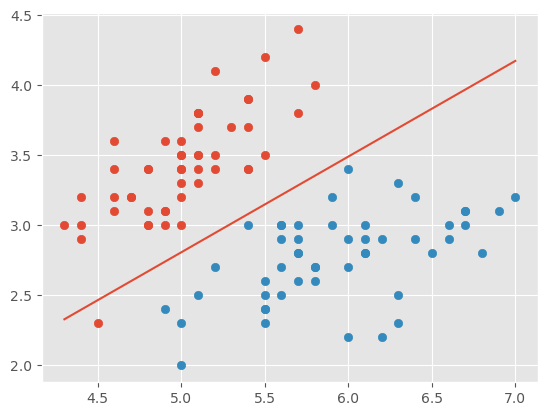

In [610]:
iris_Xs_title = 'sepal length (cm)'
iris_Ys_title = 'sepal width (cm)'
iris_Xs = np.array(iris_dataset[iris_dataset.class_!= 2].loc[:, [iris_Xs_title, iris_Ys_title]])
iris_Ys = np.array(iris_dataset[iris_dataset.class_!= 2].loc[:, ['class_']])
iris_Ys = iris_Ys.reshape(-1)

iris_log = logistic_regression(.5)

first_cost = iris_log.cost_function(iris_Xs, iris_Ys)
print('first cost:', first_cost)


for i in range(5000):
    iris_log.update(iris_Xs, iris_Ys)
    # print('accuracy:', np.mean(iris_log.predict(iris_Xs) == iris_Ys))

second_cost = iris_log.cost_function(iris_Xs, iris_Ys)
print('secomd cost:', second_cost)

line_x = np.linspace(min(iris_Xs[:, 0]), max(iris_Xs[:, 0]), 100)
m = -iris_log.tetha1 / iris_log.tetha2
c = -iris_log.tetha0 / iris_log.tetha2
line_y = m * line_x + c
plt.plot(line_x, line_y)
plt.scatter(iris_dataset[iris_dataset['class_']==0][iris_Xs_title], iris_dataset[iris_dataset['class_']==0][iris_Ys_title], label='class 0')
plt.scatter(iris_dataset[iris_dataset['class_']==1][iris_Xs_title], iris_dataset[iris_dataset['class_']==1][iris_Ys_title], label='class 1')
plt.show()